Application of Self-Organizing Maps (SOM) for Cell Type Identification
======================================================================

This script demonstrates the original application for which the SOM class and associated project 
were developed: identifying different cell types based on simulated single-cell data. By training 
a Self-Organizing Map (SOM) on high-dimensional data, this script allows for efficient clustering 
and visualization of different cell types.

Key Features:
-------------
1. Application-Specific Data:
    - The training data represents pseudo-features derived from simulated single-cell experiments.
    - Additional data (`other_dat`) includes the cell type (and other categorical data) labels for
      visualizing categorical clustering results.

2. Visualization of Results:
    - The SOM grid is used to map and visualize cell-type distributions.
    - By examining the output figures, it becomes evident that the SOM successfully identifies 
      distinct cell types based on the input data.

3. Efficient Handling of High-Dimensional Data:
    - The SOM can handle 1000 features in the training data, making it suitable for large-scale 
      single-cell datasets.

Considerations:
---------------
1. Output Figures:
    - Generating component planes for all 1000 features produces a large number of figures. 
      Uncomment the relevant section of the script to enable this visualization if desired.

2. Cell Type Identification:
    - The SOM's ability to separate and group different cell types can be verified by analyzing the 
      categorical data visualizations. Each cell type forms distinct clusters, demonstrating the
      SOM's effectiveness in preserving topology and capturing meaningful patterns in high-
      dimensional data.

# 1. Imports

In [1]:
# Standard imports
import os
import sys

# Third party imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Local imports
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)
from SOM.utils.som_utils import SOM

# 2. Load Data

In [2]:
# Load data
train_dat_path = os.path.join(parent_dir, 'SOM', 'data', 'seq_sim_training_data.csv')
other_dat_path = os.path.join(parent_dir, 'SOM', 'data', 'seq_sim_categorical_data.csv')

train_dat = pd.read_csv(train_dat_path)
other_dat = pd.read_csv(other_dat_path)

# 3. Train SOM

In [3]:
# Train SOM
som = SOM(
    train_dat=train_dat,
    other_dat=other_dat,
    scale_method="zscore",
    x_dim=4,
    y_dim=3,
    topology="hexagonal",
    neighborhood_fnc="gaussian",
    epochs=20
)

# Train SOM Map
som.train_map()

# 4. Plot layout of SOM with neuron IDs

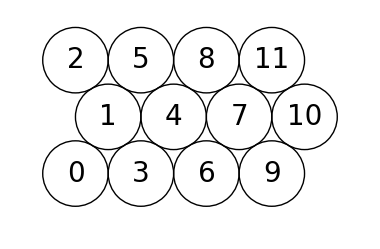

In [4]:
som.plot_map_grid(print_neuron_idx=True);

# 5. Plot component planes and categorical data (see output directory for figures)

In [ ]:
# Since there are 1000  features, this creates 1000 figures. Uncomment if you want to create
# these figures
# som.plot_component_planes(
#     output_dir="output/seq"
# )

# Plot SOM Map Using Categorical Data
som.plot_categorical_data(
    output_dir="output/seq"
)

# 6. Custom plotting for seq visualization for each neuron

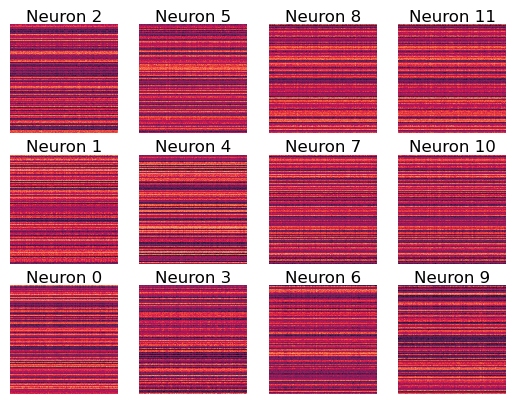

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4)

for i in range(12):
    ax = axes[2 - i % 3, i // 3]
    neuron_observations = train_dat.iloc[som.observation_mapping == i, 0:200]
    sns.heatmap(
        data=neuron_observations.T, 
        vmin=-2, 
        vmax=2.5, 
        ax=ax, 
        cbar=False
    )
    ax.tick_params(
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False,
        bottom=False
    )
    ax.set_title(f"Neuron {i}", pad=1, fontsize=12)